<a href="https://colab.research.google.com/github/mnocerino23/Winner-s-Circle-Strategy-Analysis/blob/main/Winner'sCircle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
horses = pd.read_csv('/content/drive/MyDrive/Data_Science_Projects/horses.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
#The horses dataframe contains the 28 horses within the game
#and the length of each of their runs for a certain dice roll (the die has head, helmet, saddle, and horseshoe on it)

#Correct spelling error in csv file
horses.rename(columns = {'Horeshoe':'Horseshoe'}, inplace = True)
print(horses.shape)
horses.head()

(28, 5)


,Name,Head,Helmet,Saddle,Horseshoe
0,Stymie,3,12,4,5
1,Twenty Grand,3,1,5,15
2,Gallant Fox,5,8,3,4
3,Devil Diver,2,14,1,9
4,Top Flight,1,3,12,12


In [33]:
#See the datatypes of each feature and the presence of null values within the dataframe using .info()
horses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       28 non-null     object
 1   Head       28 non-null     int64 
 2   Helmet     28 non-null     int64 
 3   Saddle     28 non-null     int64 
 4   Horseshoe  28 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.2+ KB


Feature Engineering - we will build additional stats for each horse based on probability and the goal of the game

In [34]:
#Average Advance - the average length of a move by a horse. We multiply the probability of each dice roll by the length of move for that dice roll for every horse
#In Winner's Circle the die is not even so Head has a 3/6 chance while helmet, saddle, and horseshoe all have a probability of 1/6

#In other words
#P(horse) = 0.5
#P(helmet) = 0.166
#P(saddle) = 0.166
#P(horseshoe) = 0.166

horses['Average Advance'] = ''
for index, row in horses.iterrows():
  horses.at[index, 'Average Advance'] = (1/2)*horses.at[index, 'Head'] + (1/6)*horses.at[index, 'Helmet'] + (1/6)*horses.at[index, 'Saddle'] + (1/6)*horses.at[index, 'Horseshoe']

horses.head()


,Name,Head,Helmet,Saddle,Horseshoe,Average Advance
0,Stymie,3,12,4,5,5.0
1,Twenty Grand,3,1,5,15,5.0
2,Gallant Fox,5,8,3,4,5.0
3,Devil Diver,2,14,1,9,5.0
4,Top Flight,1,3,12,12,5.0


In [35]:
#Having calculated average advance we see that the creator's of the game have made this equal for every horse. However, we can still engineer
#additional features to continue to explore the question regarding if certain horses are better or all perform equally

horses['Prob-Non-Head'] = ''
for index, row in horses.iterrows():
  horses.at[index, 'Prob-Non-Head'] = (1/6)*horses.at[index, 'Helmet'] + (1/6)*horses.at[index, 'Saddle'] + (1/6)*horses.at[index, 'Horseshoe']
horses['Prob-Head'] = ''
for index, row in horses.iterrows():
  horses.at[index, 'Prob-Head'] = (1/2)*horses.at[index, 'Head']

horses.head()

,Name,Head,Helmet,Saddle,Horseshoe,Average Advance,Prob-Non-Head,Prob-Head
0,Stymie,3,12,4,5,5.0,3.5,1.5
1,Twenty Grand,3,1,5,15,5.0,3.5,1.5
2,Gallant Fox,5,8,3,4,5.0,2.5,2.5
3,Devil Diver,2,14,1,9,5.0,4.0,1.0
4,Top Flight,1,3,12,12,5.0,4.5,0.5


In [36]:
#Add a feature named contains breakaway. If the horse has a run of 10 or more for any of the dice rolls, we say contains breakaway move is True
horses['Contains Breakaway'] = ''
sides = ['Helmet','Saddle','Horseshoe']

for index, row in horses.iterrows():
  contains = False
  for item in sides:
    if horses.at[index,item] >= 10:
      horses.at[index, 'Contains Breakaway'] = True
      contains = True
      break
  if contains == False:
    horses.at[index, 'Contains Breakaway'] = False

In [37]:
#Good head - create a new feature that is True if head move > 3 (good) and False if head move <= 3 (poor)
horses['Good Head'] = ''
for index, rows in horses.iterrows():
  if horses.at[index,'Head'] <= 3:
    horses.at[index,'Good Head'] = False
  else:
    horses.at[index,'Good Head'] = True

horses.head(15)

,Name,Head,Helmet,Saddle,Horseshoe,Average Advance,Prob-Non-Head,Prob-Head,Contains Breakaway,Good Head
0,Stymie,3,12,4,5,5.0,3.5,1.5,True,False
1,Twenty Grand,3,1,5,15,5.0,3.5,1.5,True,False
2,Gallant Fox,5,8,3,4,5.0,2.5,2.5,False,True
3,Devil Diver,2,14,1,9,5.0,4.0,1.0,True,False
4,Top Flight,1,3,12,12,5.0,4.5,0.5,True,False
5,Busher,4,1,16,1,5.0,3.0,2.0,True,True
6,Regret,1,20,4,3,5.0,4.5,0.5,True,False
7,Discovery,4,10,7,1,5.0,3.0,2.0,True,True
8,Sir Barton,3,10,10,1,5.0,3.5,1.5,True,False
9,Gallorette,3,9,5,7,5.0,3.5,1.5,False,False


Below, I write a function to simulate the board game to see if certain horses are more likely to win

In [38]:
#Function to detect whether a horse has one the race. This will be checked before the start of every turn
def detect_winner(horses):
  for val in horses.values():
    if val > 36:
      return True
  return False

In [39]:
#Function to detect if a value in a dictionary is unique. Returns a boolean
def is_unique(val, dictionary):
  if val not in dictionary.values():
    return True
  else:
    return False 

In [40]:
def move(name, horses, positions, die):
  #Get info from dataframe for that horse. Since names are unique h should be a dataframe of one row
  #print("Move: ", name)
  h = horses.loc[horses['Name'] == name]
  #Dice roll
  roll = random.choice(die)
  
  #Get how far that particular horse runs for a given die roll

  #Convert row which has the datatype of a pandas series to a list. To access the value use roll[0]
  roll = h[roll].tolist()
  length_run = roll[0]
  #print("Length:", length_run)

  new_position = positions[name] + length_run
  if is_unique(new_position, positions) == True:
    positions[name] = new_position

  #Calculate length of the run (take into account collisions- similar conceptually to hashing)
  #Handle any collisions that occur as horses cannot occupy the same space (as the rules describe)
  else:
    while is_unique(new_position, positions) != True:
      #print("COLLISION")
      if new_position == positions[name]:
        break
      new_position -=1
    positions[name] = new_position

In [41]:
c = []
winners = []
starting_pos_winner = []

In [42]:
import random

def winners_circle():
  #The unbalanced die has 3 heads, 1 helmet, 1 saddle, and 1 horseshoe
  die = ['Head', 'Head', 'Head', 'Helmet', 'Saddle', 'Horseshoe'] 

  #Choose 7 random horses to start a round (simulates shuffling)
  competitors = [random.choice(horses['Name']) for n in range(7)]
  c.append(competitors)
  positions = {}

  #Initialize starting positions of each horse. We will use a dictionary to store the horses location on the board.
  #The first key in the dictionary to obtain a value higher than 36 wins the race
  x = -7
  for i in range(len(competitors)):
    positions[competitors[i]] = x
    x+= 1
  #print(positions)

  #Complete turns in the game continue until there is a winner 
  while detect_winner(positions) == False:
    #Each horse has to go once before the next round starts.
    #We need a dictionary to store whether or not a horse has gone in a particular round.
    visited = {}
    for names in positions.keys():
      visited[names] = False
    for i in range(7):
      if detect_winner(positions) == False:
        if False in visited.values():
          next = random.choice(competitors)
          while visited[next] == True:
            next = random.choice(competitors)
          move(next, horses, positions, die)
          #print(positions)
          visited[next] = True
          if detect_winner(positions) == True:
            winner = max(positions, key = positions.get)
            winners.append(winner)
            break
        else:
          break
      else:
        #Return the winner information
        #print(max(positions, key = positions.get))
        winner = max(positions, key = positions.get)
        winners.append(winner)
        #starting_pos_winner.append(starting_pos[winner])
        break
  #Return the winner information

  #save the name and starting position of the horse
  #number of moves it took
  #number of breakaways

Use a for loop to simulate 100,000 games of winner's circle so that we can calculate the winning percentage of each of the horses

In [43]:
for i in range(100000):
  winners_circle()
print(len(c), c)
print(len(winners), winners)
#print(len(starting_pos_winner),starting_pos_winner)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [44]:
wins = {}
for player in winners:
  if player not in wins.keys():
    wins[player] = 1
  else:
    wins[player] += 1

In [45]:
print(wins)

{'Twenty Grand': 4817, 'Devil Diver': 4927, 'Assault': 4456, 'Busher': 5237, 'War Admiral': 3408, 'Discovery': 3368, 'Count Fleet': 2885, 'Twilight Tear': 3553, 'Regret': 6282, 'Old Rosebud': 4585, 'Armed': 3648, 'Whirlaway': 3792, 'Stymie': 3689, 'Sir Barton': 4101, 'Zev': 4101, "Man o' War": 2806, 'Gallant Fox': 2187, 'Alsab': 4860, 'Colin': 2449, 'Gallorette': 2915, 'Exterminator': 2183, 'Citation': 2516, 'Grey Lag': 4227, 'Top Flight': 5380, 'Synsonby': 1519, 'Equipoise': 1817, 'Challedon': 1843, 'Phar Lap': 2449}


In [46]:
appearances = {}
for player in horses['Name']:
  appearances[player] = 0
  for game in c:
    if player in game:
      appearances[player] +=1
print(appearances)

{'Stymie': 22376, 'Twenty Grand': 22527, 'Gallant Fox': 22777, 'Devil Diver': 22473, 'Top Flight': 22495, 'Busher': 22450, 'Regret': 22241, 'Discovery': 22412, 'Sir Barton': 22318, 'Gallorette': 22579, 'Assault': 22610, 'War Admiral': 22638, 'Armed': 22472, 'Phar Lap': 22489, "Man o' War": 22443, 'Whirlaway': 22556, 'Colin': 22380, 'Exterminator': 22480, 'Twilight Tear': 22549, 'Citation': 22387, 'Challedon': 22356, 'Alsab': 22698, 'Synsonby': 22546, 'Equipoise': 22404, 'Count Fleet': 22367, 'Grey Lag': 22512, 'Zev': 22430, 'Old Rosebud': 22306}


In [47]:
simulation = pd.DataFrame(columns = ['Horse', 'Wins', 'Appearances', 'Win %'])
simulation['Horse'] = horses['Name']

for index, row in simulation.iterrows():
  simulation.at[index,'Wins'] = wins[simulation.at[index,'Horse']]
  simulation.at[index,'Appearances'] = appearances[simulation.at[index,'Horse']]
  simulation.at[index,'Win %'] = (simulation.at[index,'Wins']/simulation.at[index,'Appearances'])

simulation.sort_values(by = ['Win %'], inplace = True, ascending = False)
simulation.head(30)

,Horse,Wins,Appearances,Win %
6,Regret,6282,22241,0.282451
4,Top Flight,5380,22495,0.239164
5,Busher,5237,22450,0.233274
3,Devil Diver,4927,22473,0.219241
21,Alsab,4860,22698,0.214116
1,Twenty Grand,4817,22527,0.213832
27,Old Rosebud,4585,22306,0.20555
10,Assault,4456,22610,0.197081
25,Grey Lag,4227,22512,0.187767
8,Sir Barton,4101,22318,0.183753


In [48]:
#Save simulation results to a csv so we don't have to run the expensive calculation of winnerscircle 100,000 times again
simulation.to_csv('100000_games_simulation.csv')

In [49]:
#Add win percentage onto the original horses dataframe and then begin some analysis with win percentage as the target variable.
#We want to explore what features of a horse relate to high win percentage

In [50]:
horses['Simulated Win %'] = ''
map = dict(zip(simulation['Horse'], simulation['Win %']))
for index, row in horses.iterrows():
  horses.at[index, 'Simulated Win %'] = map[horses.at[index, 'Name']]

In [51]:
horses.head(30)

,Name,Head,Helmet,Saddle,Horseshoe,Average Advance,Prob-Non-Head,Prob-Head,Contains Breakaway,Good Head,Simulated Win %
0,Stymie,3,12,4,5,5.0,3.5,1.5,True,False,0.164864
1,Twenty Grand,3,1,5,15,5.0,3.5,1.5,True,False,0.213832
2,Gallant Fox,5,8,3,4,5.0,2.5,2.5,False,True,0.096018
3,Devil Diver,2,14,1,9,5.0,4.0,1.0,True,False,0.219241
4,Top Flight,1,3,12,12,5.0,4.5,0.5,True,False,0.239164
5,Busher,4,1,16,1,5.0,3.0,2.0,True,True,0.233274
6,Regret,1,20,4,3,5.0,4.5,0.5,True,False,0.282451
7,Discovery,4,10,7,1,5.0,3.0,2.0,True,True,0.150277
8,Sir Barton,3,10,10,1,5.0,3.5,1.5,True,False,0.183753
9,Gallorette,3,9,5,7,5.0,3.5,1.5,False,False,0.129102


In [52]:
horses.to_csv('horses_with_simulation.csv')

Sort horses dataframe in descending order by Simulated Win %

In [53]:
horses = horses.sort_values(by = ['Simulated Win %'], ascending = False)
horses.to_csv('horses_ordered.csv')
horses.head(30)

,Name,Head,Helmet,Saddle,Horseshoe,Average Advance,Prob-Non-Head,Prob-Head,Contains Breakaway,Good Head,Simulated Win %
6,Regret,1,20,4,3,5.0,4.5,0.5,True,False,0.282451
4,Top Flight,1,3,12,12,5.0,4.5,0.5,True,False,0.239164
5,Busher,4,1,16,1,5.0,3.0,2.0,True,True,0.233274
3,Devil Diver,2,14,1,9,5.0,4.0,1.0,True,False,0.219241
21,Alsab,1,6,12,9,5.0,4.5,0.5,True,False,0.214116
1,Twenty Grand,3,1,5,15,5.0,3.5,1.5,True,False,0.213832
27,Old Rosebud,1,10,9,8,5.0,4.5,0.5,True,False,0.20555
10,Assault,5,1,1,13,5.0,2.5,2.5,True,True,0.197081
25,Grey Lag,2,4,12,8,5.0,4.0,1.0,True,False,0.187767
8,Sir Barton,3,10,10,1,5.0,3.5,1.5,True,False,0.183753


Use Seaborn heatmap to see the correlations between the different variables so we can investigate what features are correlated with high winning %

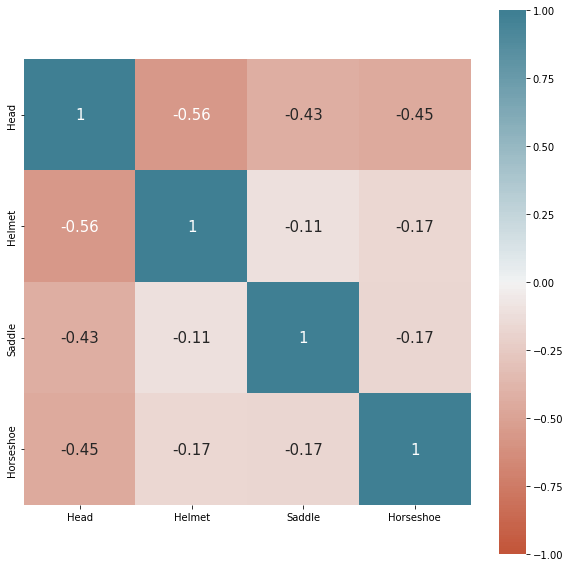

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize = (10,10))
sns.heatmap(horses.corr(), 
            vmin = -1,
            vmax = 1, 
            center = 0,
            cmap = sns.diverging_palette(20,220,n = 200),
            annot = True, annot_kws = {'size': 15},
            square = True
            )